<a href="https://colab.research.google.com/github/anzalshaikh27/Travel-Insurance-Prediction-Using-Machine-Learning/blob/main/Travel_Insurance_Prediction_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About Dataset (Travel Insurance Prediction)**
*Context*:
A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.The New Insurance Package Also Includes Covid Cover.
The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.The Data Is Provided For Almost 2000 Of Its Previous Customers And You Are Required To Build An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance Package Based On Certain Parameters.

1) Numeric Datatypes:

--> "Index", "Age", "AnnualIncome", "FamilyMembers", and "TravelInsurance" columns have numeric data types (int64).

2) Categorical Datatypes:

--> "Employment Type", "GraduateOrNot", "FrequentFlyer", and "EverTravelledAbroad" columns have categorical data (object)

3) Target:

--> TravelInsurance (represented as 0 or 1)

In [1]:
#installing required packages
!pip install eli5
!pip install fancyimpute
!pip install xgboost
!pip3 install h2o
!pip install requests
!pip install tabulate
!pip install future
!pip install shap
!pip install scikit-learn imbalanced-learn

# for outlier preprocessing
!pip install datasist



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=ca6e2e2bdc4d93fd9956501619c11af548bd5032899fab22a9e36178c0db4372
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 12.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=35cee390ad08f92d52f7a58f0ef7146f494f39df71c14b675a1eb933779c695d
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=d57a1f13b758c648df2c6ec492f7967b5bfc76c9edc2a47f889d8f6cff4b7353
  Stor

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor, LogisticRegression
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Reading datset from GitHub

In [3]:
# Reading dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/anzalshaikh27/Travel-Insurance-Prediction/main/TravelInsurancePrediction.csv"
)
data

,Index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [4]:
#defining datatype
data.dtypes

Index                   int64
Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

# Removing null values

In [5]:
# removing null values
#isnull() method to check for missing values in each column and sum() method is applied to count the missing values in each column.
data.isnull().sum()

Index                  0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

# Dropping Index column as its not required for the model prediction

In [6]:
# Excluding the ID column as its not required
data = data.drop('Index', axis=1)
data.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


# Removing extra spaces and converting categorical data to numeric

In [7]:
#removing extra white spaces
data['GraduateOrNot'] = data['GraduateOrNot'].str.strip()
data['FrequentFlyer'] = data['FrequentFlyer'].str.strip()
data['EverTravelledAbroad'] = data['EverTravelledAbroad'].str.strip()
data['Employment Type'] = data['Employment Type'].str.strip()

#converting categorical values to numeric
data["GraduateOrNot"]= data["GraduateOrNot"].map({"No" :0, "Yes" : 1})
data["FrequentFlyer"]= data["FrequentFlyer"].map({"No" :0, "Yes" : 1})
data["EverTravelledAbroad"]= data["EverTravelledAbroad"].map({"No" :0, "Yes" : 1})
data["Employment Type"]= data["Employment Type"].map({"Government Sector" :0, "Private Sector/Self Employed" : 1})

#defining categorical and numerical values
cats = []
nums = []
for i in data.columns:
  if data[i].dtype=='object':
    cats.append(i)
  else:
    nums.append(i)
print('cats = ',cats)
print('nums = ',nums)

data

cats =  []
nums =  ['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,1,1,1500000,4,0,1,1,1
1983,28,1,1,1750000,5,1,0,1,0
1984,28,1,1,1150000,6,1,0,0,0
1985,34,1,1,1000000,6,0,1,1,1


In [8]:

#method in pandas DataFrame which provides a summary of descriptive statistics for numeric columns.
data.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,0.713135,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323
std,2.913308,0.452412,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332
min,25.000000,0.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


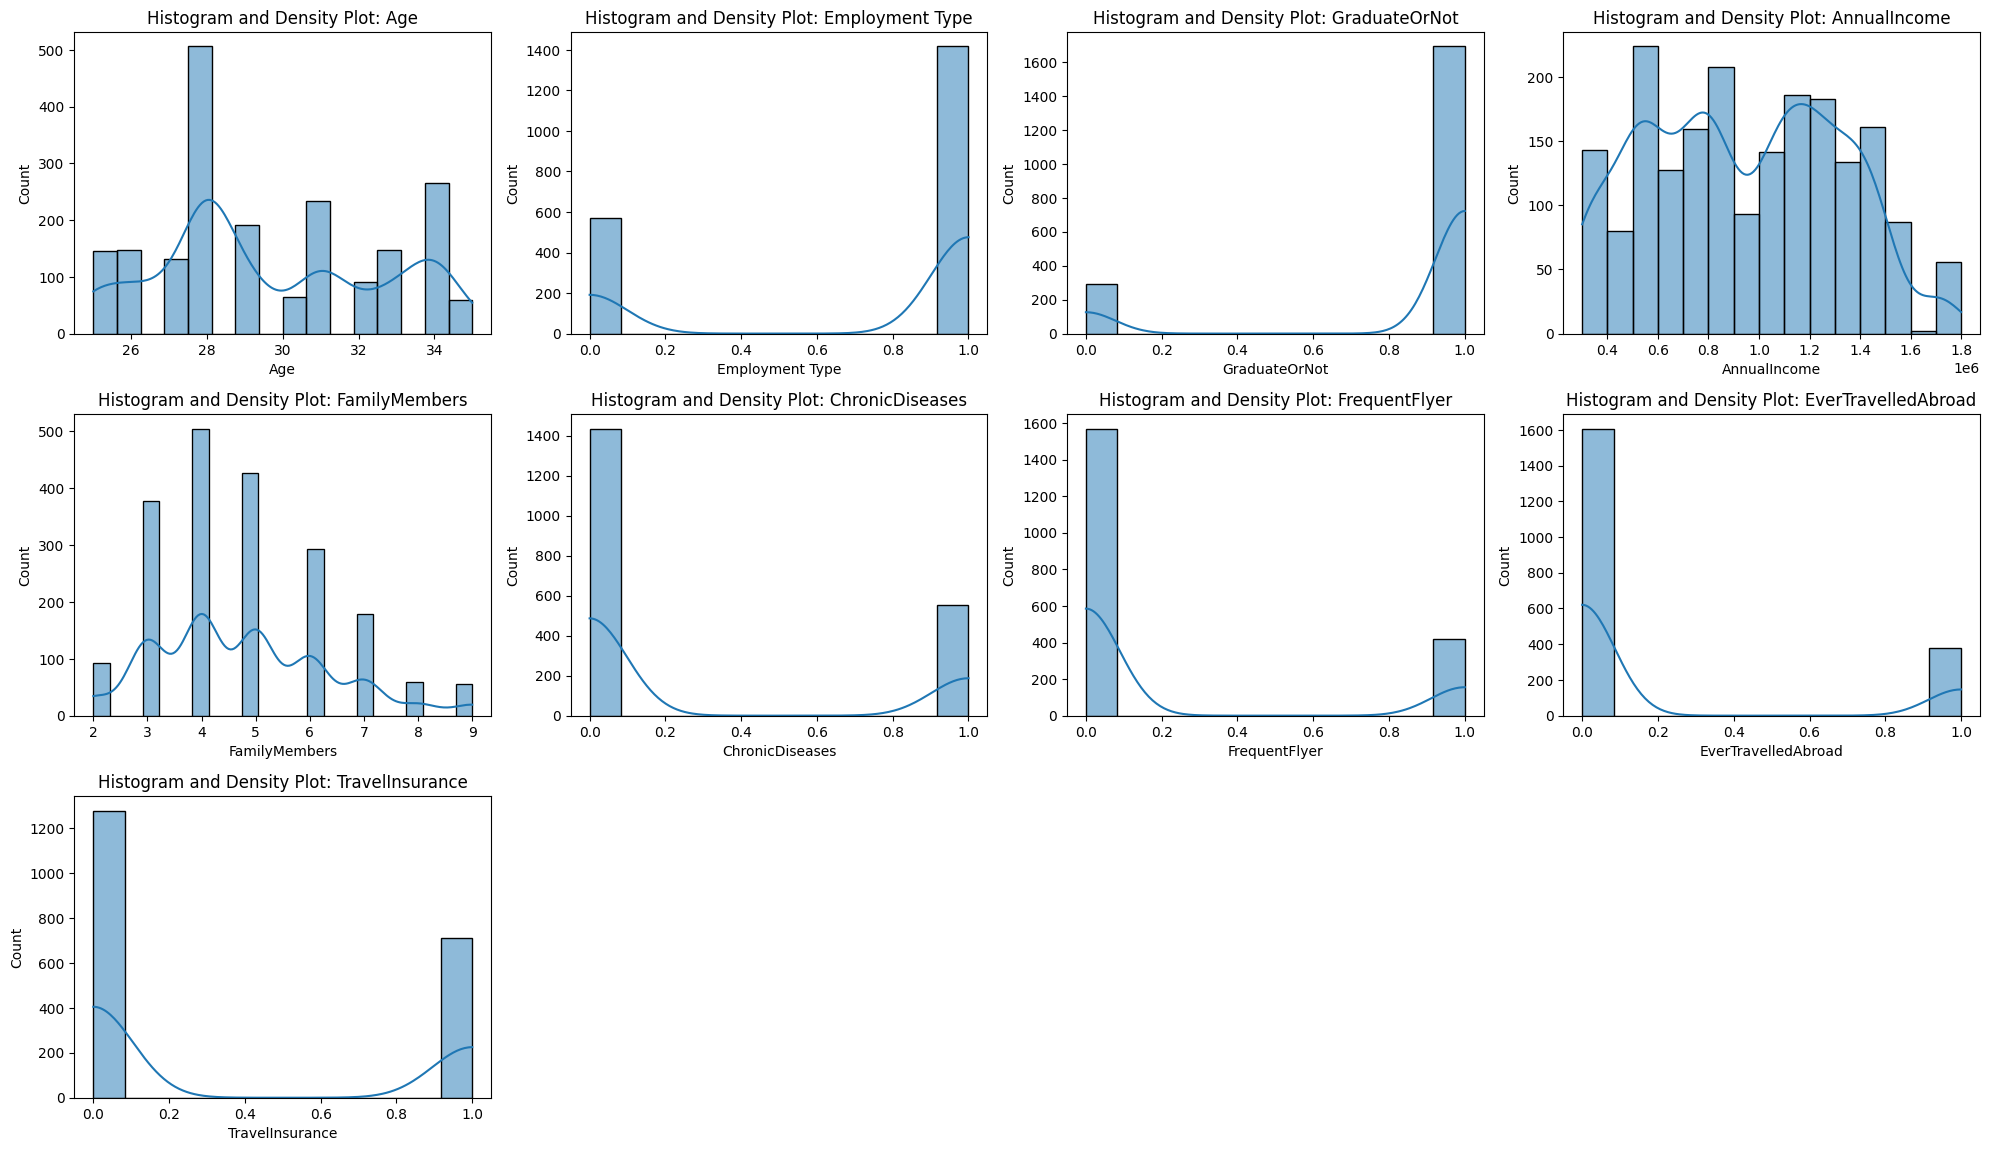

In [9]:
#Histogram

# Plotting histograms and density plots for all numeric variables

# Filtering out the numeric variables for the density plot
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Setting up the matplotlib figure
plt.figure(figsize=(20, 15))

# Enumerating through the numeric columns and plotting histograms and density plots
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(numeric_data[column], kde=True)
    plt.title(f'Histogram and Density Plot: {column}')

plt.tight_layout()  # Adjusts plot to ensure it fits into the figure area
plt.show()  # Displays the plot


# Checking the distribution of independent variables using QQ plot

<Figure size 800x500 with 0 Axes>

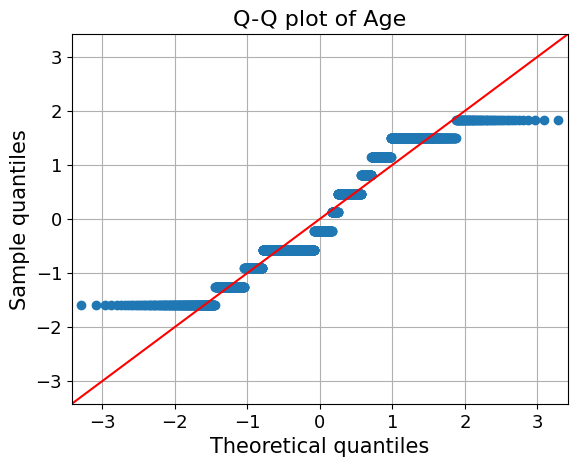

<Figure size 800x500 with 0 Axes>

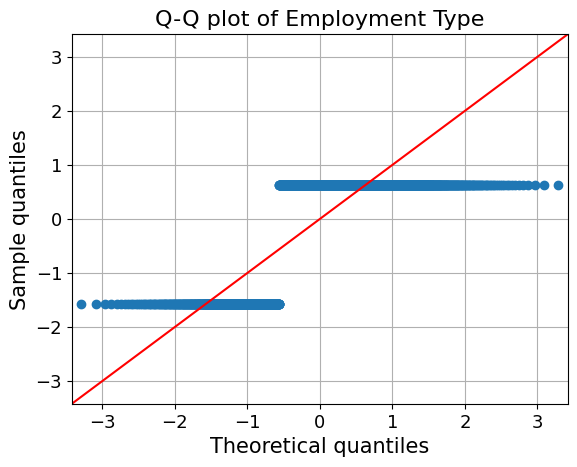

<Figure size 800x500 with 0 Axes>

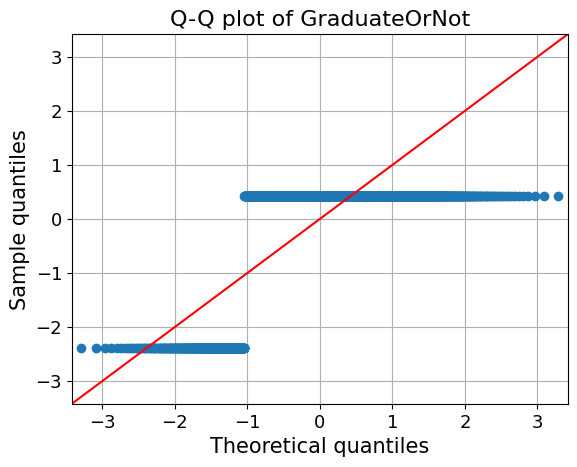

<Figure size 800x500 with 0 Axes>

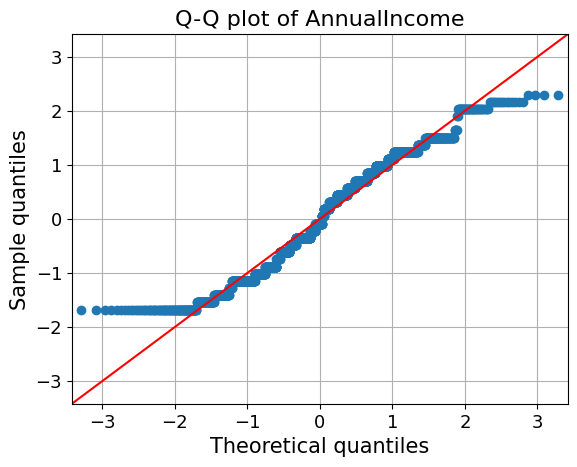

<Figure size 800x500 with 0 Axes>

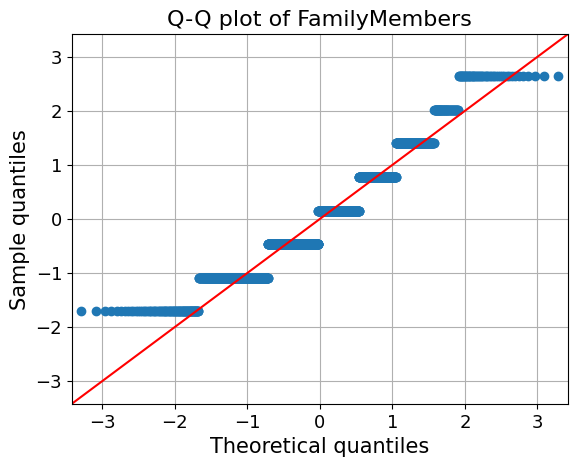

<Figure size 800x500 with 0 Axes>

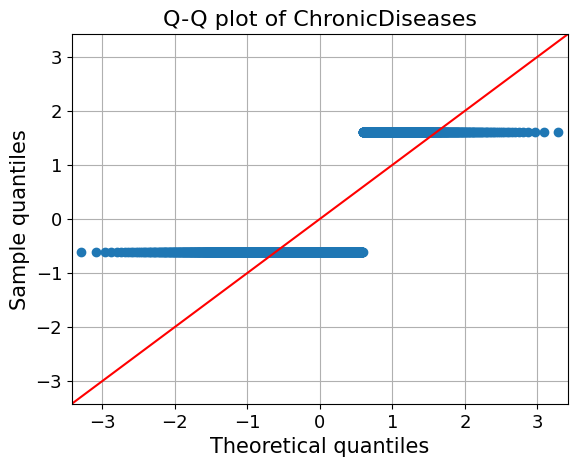

<Figure size 800x500 with 0 Axes>

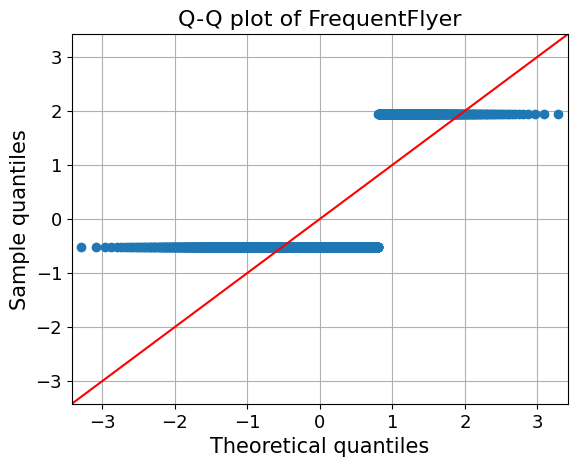

<Figure size 800x500 with 0 Axes>

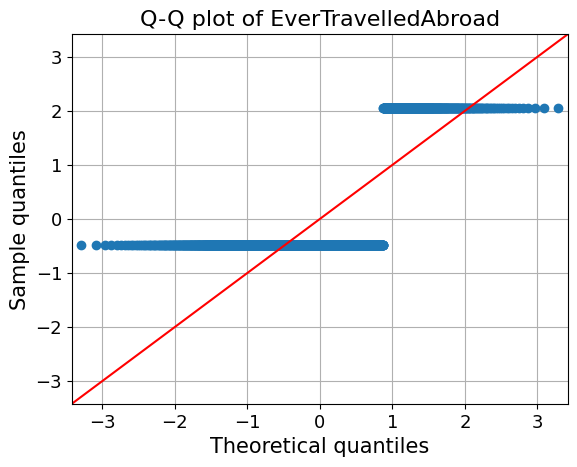

<Figure size 800x500 with 0 Axes>

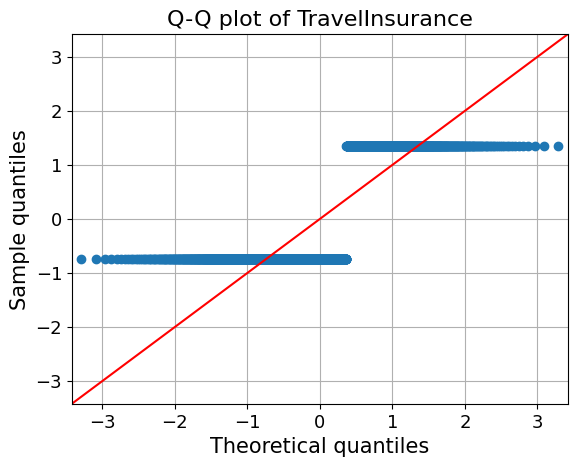

In [10]:
#QQ plot

# checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

# Remove non-numeric or categorical columns from the DataFrame
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Drop any rows with missing or invalid values in the numeric columns
data_numeric = data[numeric_columns].dropna()

# Plot Q-Q plots for each numeric column
for column in data_numeric.columns:
    plt.figure(figsize=(8, 5))
    qqplot(data_numeric[column], line='45', fit=True)
    plt.xlabel('Theoretical quantiles', fontsize=15)
    plt.ylabel('Sample quantiles', fontsize=15)
    plt.title(f'Q-Q plot of {column}', fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(True)
    plt.show()


<Axes: >

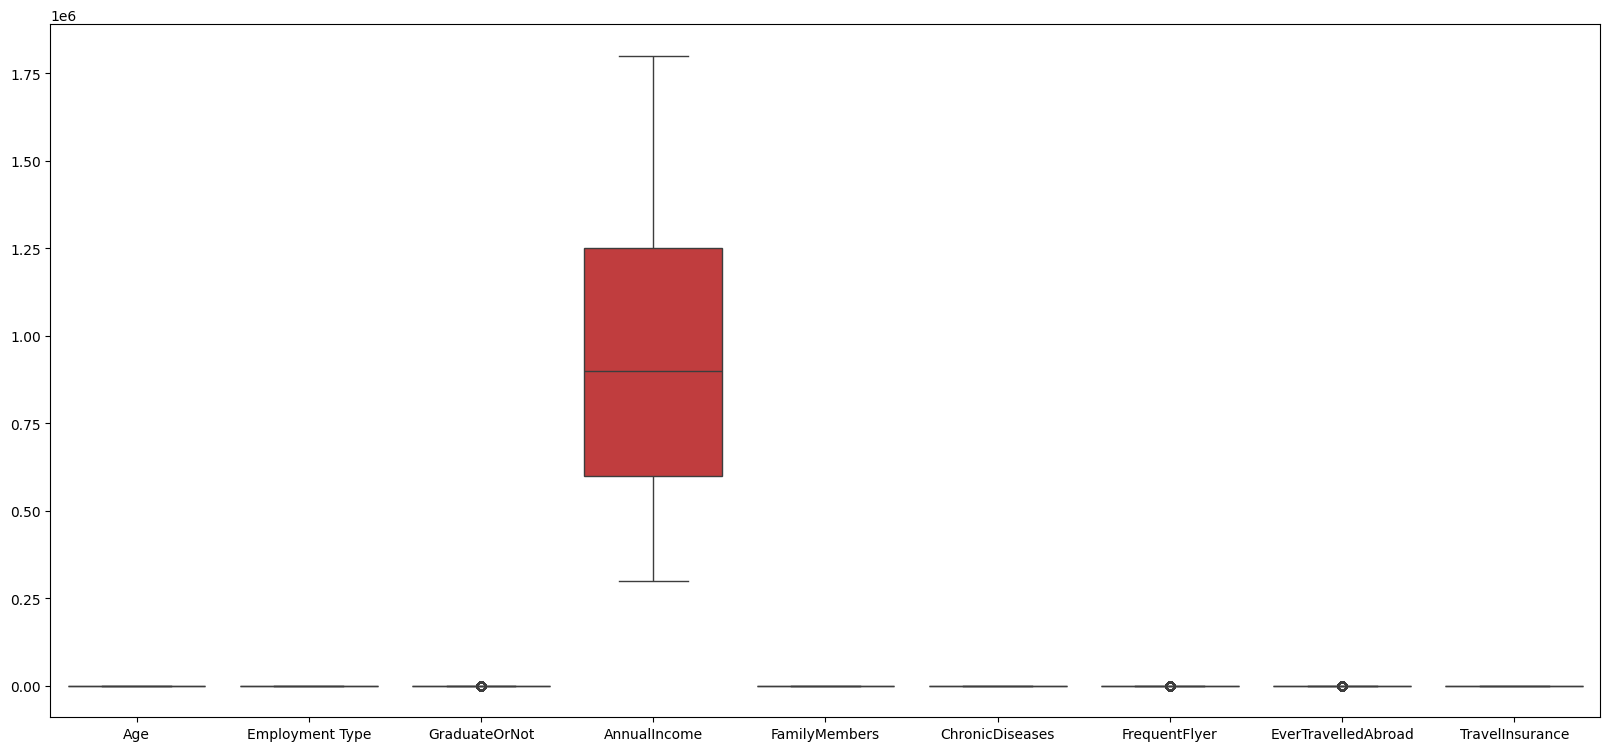

In [11]:
#checking outliers values
plt.figure(figsize=(20, 9))
sns.boxplot(data=data)

# Normalizing the data in the Annual Income, Age and FamilyMembers column beacuse the value is too high when compared to other independent variable


<Axes: >

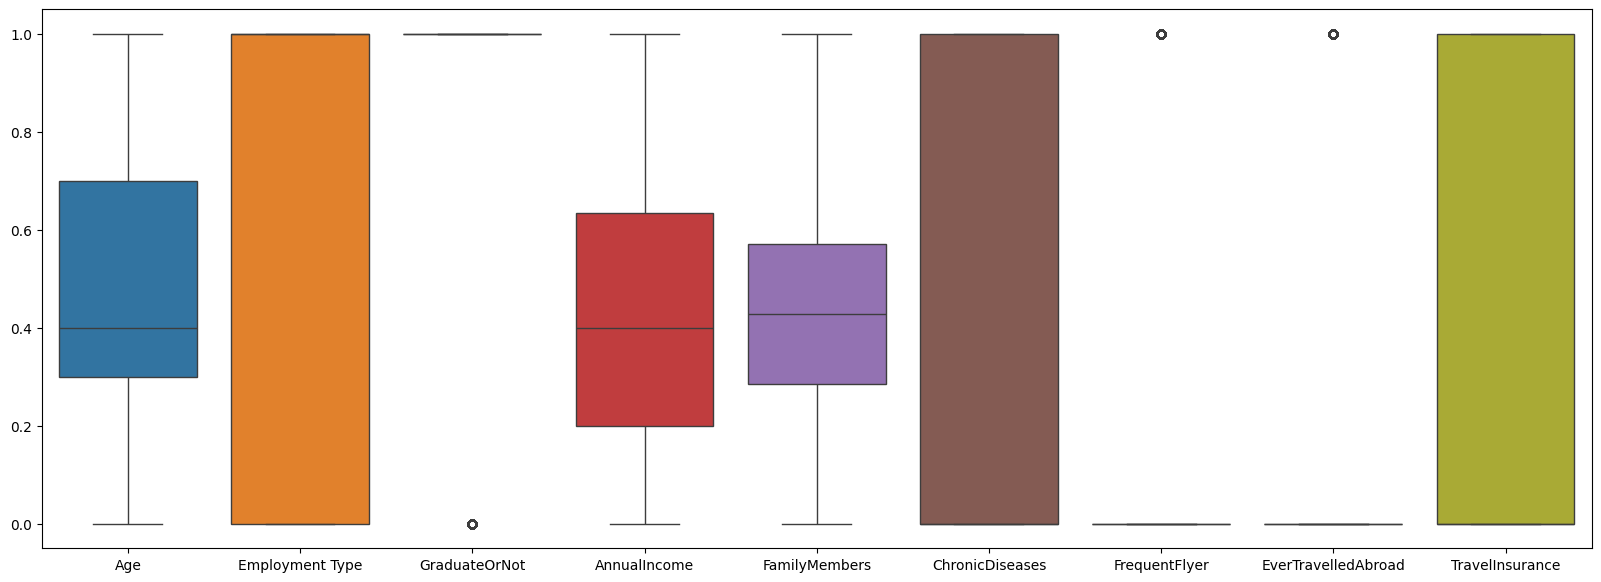

In [12]:

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[["AnnualIncome"]].values.astype(float)
x2 = data[["Age"]].values.astype(float)
x3 = data[["FamilyMembers"]].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
x2_scaled = min_max_scaler.fit_transform(x2)
x3_scaled = min_max_scaler.fit_transform(x3)

# Run the normalizer on the dataframe
data[["AnnualIncome"]] = pd.DataFrame(x_scaled)
data[["Age"]] = pd.DataFrame(x2_scaled)
data[["FamilyMembers"]] = pd.DataFrame(x3_scaled)

# Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)

Class Distribution:
0    1277
1     710
Name: TravelInsurance, dtype: int64

Class Proportions:
0    0.642677
1    0.357323
Name: TravelInsurance, dtype: float64


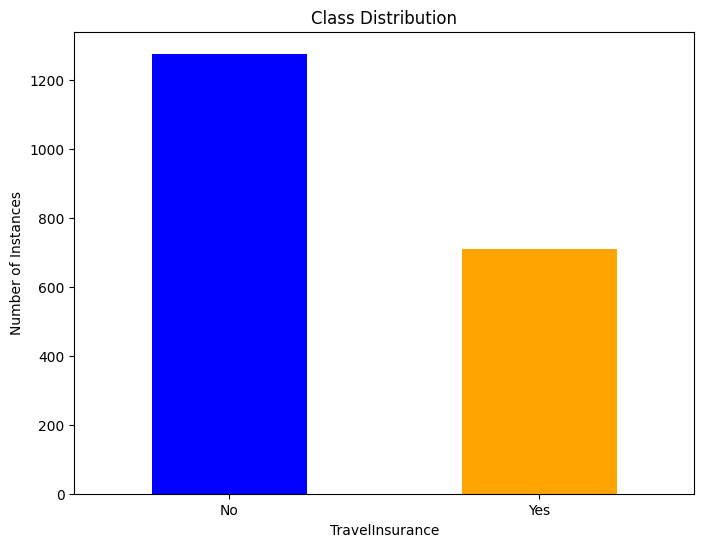

In [13]:
# Count the number of instances for each class
class_counts = data['TravelInsurance'].value_counts()

# Calculate the proportion of each class label relative to the total number of instances
total_instances = len(data)
class_proportions = class_counts / total_instances

print("Class Distribution:")
print(class_counts)
print("\nClass Proportions:")
print(class_proportions)

# Visualize the class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('TravelInsurance')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

# Performing SMOTE to balance the dataset

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

# Gene  rate a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Count the class distribution before applying SMOTE
print("Before SMOTE:", Counter(y))

# Apply SMOTE to generate synthetic samples
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the class distribution after applying SMOTE
print("After SMOTE:", Counter(y_resampled))
data.tail()

Before SMOTE: Counter({1: 900, 0: 100})
After SMOTE: Counter({1: 900, 0: 900})


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,0.8,1,1,0.800000,0.285714,0,1,1,1
1983,0.3,1,1,0.966667,0.428571,1,0,1,0
1984,0.3,1,1,0.566667,0.571429,1,0,0,0
1985,0.9,1,1,0.466667,0.571429,0,1,1,1
1986,0.9,1,1,0.133333,0.285714,0,0,0,0


#Correlation Matrix with HeatMap (Pearson correlation coefficient)

--> checking the correlation between all the features in the data

In [15]:

correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['TravelInsurance'].abs().sort_values(ascending=False)
print("Correlation with target variable:")
print(correlation_with_target)

Correlation with target variable:
TravelInsurance        1.000000
EverTravelledAbroad    0.433183
AnnualIncome           0.396763
FrequentFlyer          0.232103
Employment Type        0.147847
FamilyMembers          0.079909
Age                    0.061060
GraduateOrNot          0.018934
ChronicDiseases        0.018190
Name: TravelInsurance, dtype: float64


# Heat Map of the Correlation

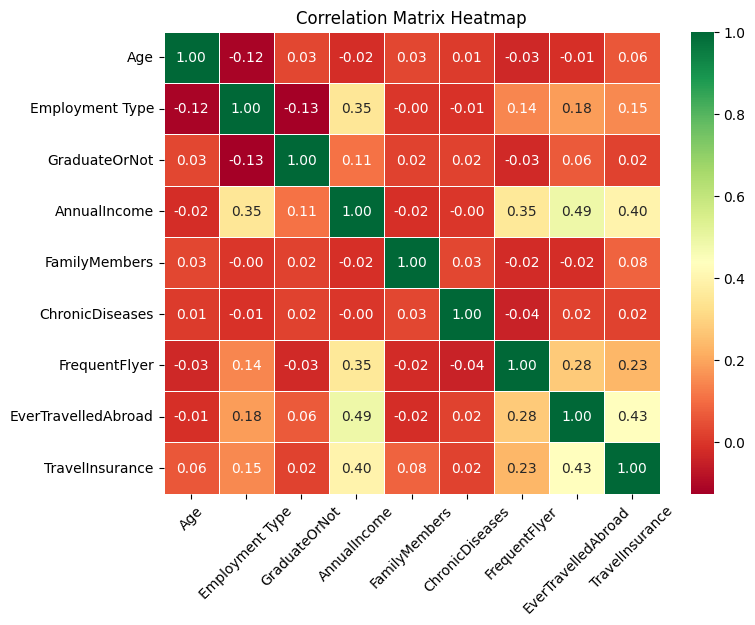

In [16]:

#seaborn's heatmap() function to plot the correlation matrix as a heatmap.
#The annot=True parameter adds numerical annotations to each cell
# cmap='coolwarm' sets the color map
# fmt=".2f" formats the annotations to two decimal places
#linewidths=0.5 adds narrow lines between cells for better readability.

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Univariate feature selection (chi-squared (χ²) test) (SelectKBest class)

In [17]:

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Separate features (X) and target variable (y)
X = data.drop('TravelInsurance', axis=1)
y = data['TravelInsurance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SelectKBest with chi-squared test to select the top 3 features
k_best_features = 3
selector = SelectKBest(chi2, k=k_best_features)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Print the names of the selected features
print(f'Selected Features: {selected_feature_names}')

# Print chi-squared scores for the selected features
chi_scores = selector.scores_[selected_feature_indices]
print(f'Chi-squared scores for the selected features: {chi_scores}')

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Fit the model to the selected features
rf_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with {k_best_features} selected features: {accuracy:.2f}')


Selected Features: Index(['AnnualIncome', 'FrequentFlyer', 'EverTravelledAbroad'], dtype='object')
Chi-squared scores for the selected features: [ 38.90651121  73.48139311 246.67631831]
Accuracy with 3 selected features: 0.80


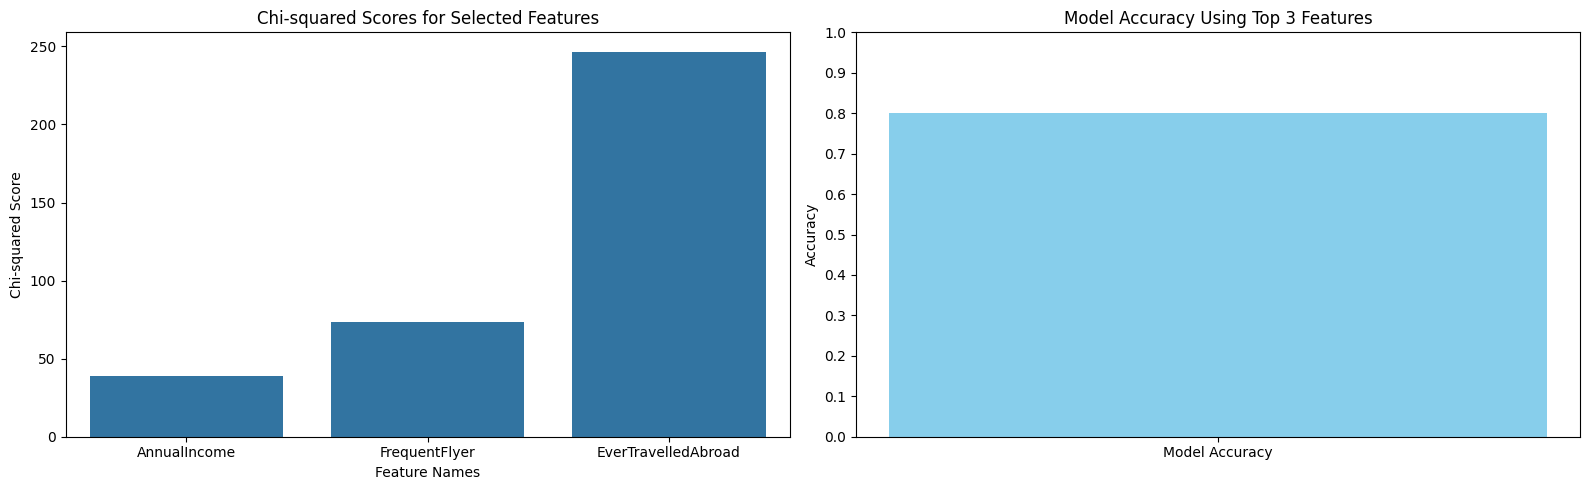

In [18]:
# Data from output
selected_feature_names = ['AnnualIncome', 'FrequentFlyer', 'EverTravelledAbroad']
chi_squared_scores = [38.90651121, 73.48139311, 246.67631831]
accuracy = 0.80

# Create the plots
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Bar plot for Chi-squared scores
sns.barplot(x=selected_feature_names, y=chi_squared_scores, ax=ax[0])
ax[0].set_title('Chi-squared Scores for Selected Features')
ax[0].set_ylabel('Chi-squared Score')
ax[0].set_xlabel('Feature Names')

# Accuracy plot
ax[1].bar('Model Accuracy', accuracy, color='skyblue')
ax[1].set_title('Model Accuracy Using Top 3 Features')
ax[1].set_ylim(0, 1)
ax[1].set_ylabel('Accuracy')
ax[1].set_yticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()
plt.show()

# Pair Plot to check the colinearity


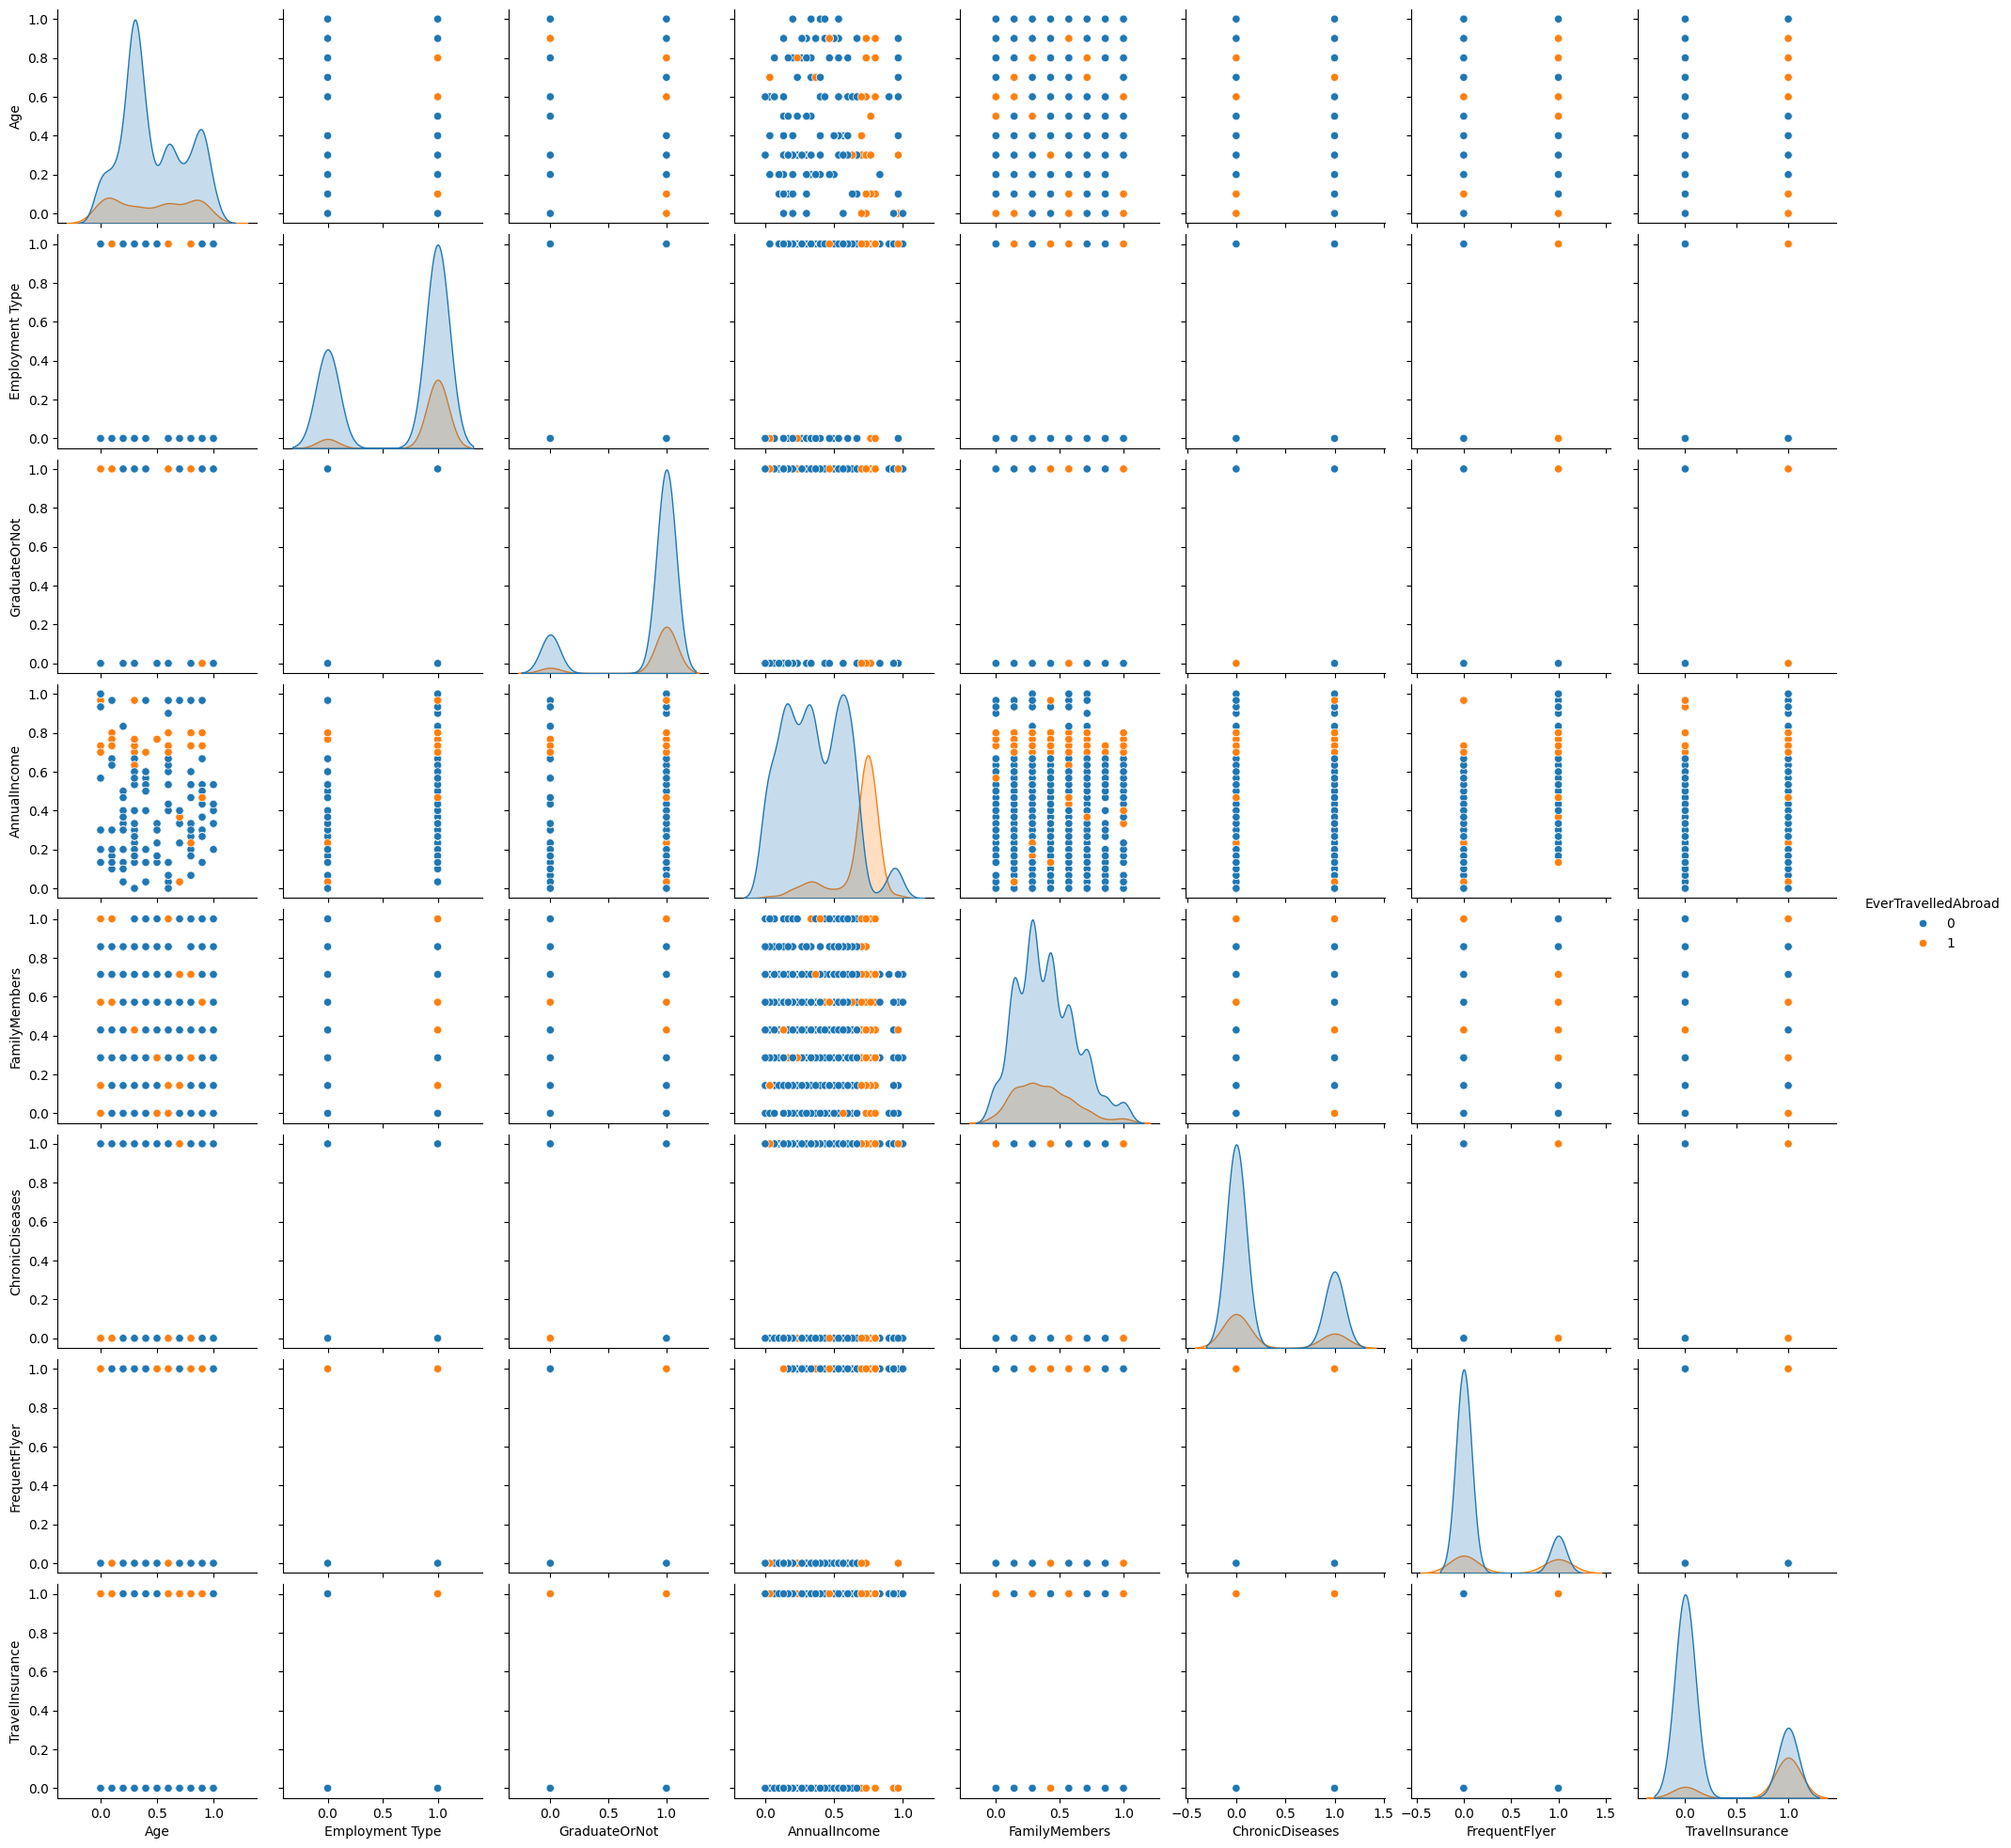

In [19]:
#sns.pairplot(data)
sns.pairplot(data, hue='EverTravelledAbroad')
plt.show()

# OLS(Ordinary Least Squares regression) for finding the p value to check the significant features


In [20]:
#p-value is a measure that helps determine the significance of an observed result
# p-values below 0.05 are often considered statistically significant.

import statsmodels.api as sm

model = sm.OLS(
    data["TravelInsurance"],
    data[
        [
            "Age",
            "FamilyMembers",
            "ChronicDiseases",
            "AnnualIncome",
            "Employment Type",
            "GraduateOrNot",
            "FrequentFlyer",
            "EverTravelledAbroad",
        ]
    ],
).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        TravelInsurance   R-squared (uncentered):                   0.519
Model:                            OLS   Adj. R-squared (uncentered):              0.517
Method:                 Least Squares   F-statistic:                              266.5
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                   1.42e-307
Time:                        17:03:01   Log-Likelihood:                         -1070.6
No. Observations:                1987   AIC:                                      2157.
Df Residuals:                    1979   BIC:                                      2202.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Age                     0.1094      0.029      3.718      0.000       0.052       0.167
FamilyMembers           0.1780      0.037      4.758      0.000       0.105       0.251
ChronicDiseases         0.0118      0.021      0.573      0.567      -0.029       0.052
AnnualIncome            0.4248      0.046      9.310      0.000       0.335       0.514
Employment Type         0.0043      0.021      0.210      0.834      -0.036       0.045
GraduateOrNot          -0.0433      0.022     -1.978      0.048      -0.086      -0.000
FrequentFlyer           0.0823      0.025      3.326      0.001       0.034       0.131
EverTravelledAbroad     0.3752      0.027     13.782      0.000       0.322       0.429
==============================================================================
Omnibus:                      168.669   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.712
Skew:                           0.700   Prob(JB):                     3.48e-40
Kurtosis:                       2.514   Cond. No.                         7.64
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Calculating VIF for each feature

In [21]:
# the independent variables set
X = data[['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome','FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']]
y = data["TravelInsurance"]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

               feature       VIF
0                  Age  2.997823
1      Employment Type  3.489517
2        GraduateOrNot  4.695010
3         AnnualIncome  5.772798
4        FamilyMembers  3.341996
5      ChronicDiseases  1.365296
6        FrequentFlyer  1.479353
7  EverTravelledAbroad  1.631100


# Calculating Accuracy based on fitting the Logistic Regression model

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred = logistic_model.predict(X2_test)

# Calculate accuracy
accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7663316582914573


# Applying Ridge regression with L2 regularization for (AnnualIncome) feature because of high multicollinearity

In [23]:
# Select the independent variables with high multicollinearity
X = data[['AnnualIncome']]

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Ridge regression with L2 regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, data['TravelInsurance'])

# Get the coefficients of the features
coefficients = ridge.coef_

# Replace the original variables with the reduced ones using the coefficients
data['AnnualIncome_Reduced'] = X_scaled.dot(coefficients)

# Drop the original highly correlated variables
data.drop(['AnnualIncome'], axis=1, inplace=True)



Performing Regularization on AnnualIncome variable as it has VIF value above threshold that is 5:

1) First standardize the independent variables to have a mean of 0 and a standard deviation of 1 to make them comparable. Then, we apply Ridge regression (Alpha = 1.0) with L2 regularization to the standardized data. Ridge regression penalizes large coefficients, which helps to reduce the impact of multicollinearity.

2) Finally, we replace the original highly correlated variables with the reduced ones using the coefficients obtained from Ridge regression. This helps to reduce multicollinearity while preserving the relationship between the features and the target variable.

In [24]:

# The independent variables set
X = data[['Age', 'Employment Type','FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'AnnualIncome_Reduced','GraduateOrNot']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

data.head()


                feature       VIF
0                   Age  2.997751
1       Employment Type  2.939647
2         FamilyMembers  3.385116
3       ChronicDiseases  1.366474
4         FrequentFlyer  1.438888
5   EverTravelledAbroad  1.634430
6  AnnualIncome_Reduced  1.424112
7         GraduateOrNot  4.191916


,Age,Employment Type,GraduateOrNot,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_Reduced
0,0.6,0,1,0.571429,1,0,0,0,-0.268725
1,0.6,1,1,0.714286,0,0,0,0,0.160014
2,0.9,1,1,0.285714,1,0,0,1,-0.218285
3,0.3,1,1,0.142857,1,0,0,0,-0.117405
4,0.3,1,1,0.857143,1,1,0,0,-0.117405


# Spliting data into Training 70%, Test set 30%


In [25]:
X1 = data[['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome_Reduced','FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']]
y1 = data['TravelInsurance']

#Spliting data into Training 70%, Test set 30%

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)



# Calculating coefficients based on each feature using Logistic Regression.

In [26]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming X is your feature matrix and y is your target variable

# Fit logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X1, y1)

# Retrieve coefficients and feature names
coefficients = logistic_model.coef_[0]
feature_names = X1.columns

# Create a dictionary mapping feature names to coefficients
feature_coefficients = dict(zip(feature_names, coefficients))

# Rank features based on the absolute magnitude of coefficients
ranked_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Print ranked features
for rank, (feature, coefficient) in enumerate(ranked_features, start=1):
    print(f"Rank {rank}: Feature '{feature}' with coefficient {coefficient}")


Rank 1: Feature 'AnnualIncome_Reduced' with coefficient 2.7893128046102578
Rank 2: Feature 'EverTravelledAbroad' with coefficient 1.718932760906705
Rank 3: Feature 'FamilyMembers' with coefficient 0.9999001648792999
Rank 4: Feature 'Age' with coefficient 0.6982395905255392
Rank 5: Feature 'FrequentFlyer' with coefficient 0.4787214542849524
Rank 6: Feature 'GraduateOrNot' with coefficient -0.1526167746015593
Rank 7: Feature 'Employment Type' with coefficient 0.12877466207368946
Rank 8: Feature 'ChronicDiseases' with coefficient 0.08762232627793767


--> AnnualIncome_Reduced: This variable has the highest coefficient magnitude, indicating that it is the most significant predictor in the model.

--> EverTravelledAbroad: The second-highest coefficient magnitude suggests that this variable is also highly significant.

--> FamilyMembers: This variable follows as the third most significant predictor.

--> Age: It ranks fourth in importance, though slightly lower than the top three.

--> FrequentFlyer: This variable is next in rank, indicating moderate significance.

--> GraduateOrNot: While it has a negative coefficient, it still has a relatively lower magnitude compared to the top predictors.

--> Employment Type: It ranks lower in significance compared to other predictors.

--> ChronicDiseases: This variable has the lowest coefficient magnitude among the predictors.

# Based on above ranking "ChronicDiseases", "Employment Type", and "GraduateOrNot" candidates is excluded from the model.

In [27]:
#Removing insignificant predictor variables from the model

columns_to_drop = ['ChronicDiseases', 'Employment Type', 'GraduateOrNot']

# Drop the columns from the DataFrame
data.drop(columns=columns_to_drop, inplace=True)


In [28]:
X = data[['Age', 'AnnualIncome_Reduced','FamilyMembers',  'FrequentFlyer', 'EverTravelledAbroad']]
y = data['TravelInsurance']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

data.head()

,Age,FamilyMembers,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AnnualIncome_Reduced
0,0.6,0.571429,0,0,0,-0.268725
1,0.6,0.714286,0,0,0,0.160014
2,0.9,0.285714,0,0,1,-0.218285
3,0.3,0.142857,0,0,0,-0.117405
4,0.3,0.857143,1,0,0,-0.117405


# Calculating Accuracy after removing unwanted feature and again performing L2 Regularization

In [29]:
#Regularization L2
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model with L2 regularization
model_l2_reg = LogisticRegression(penalty='l2', C=1.0)  # C is the inverse of regularization strength (smaller values mean stronger regularization)
model_l2_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_l2_reg = model_l2_reg.predict(X_test)

# Calculate accuracy with L2 regularization
accuracy_l2_reg = accuracy_score(y_test, y_pred_l2_reg)
print("Accuracy with L2 regularization:", accuracy_l2_reg)

Accuracy with L2 regularization: 0.7855946398659966


# Accuracy has been been increased by 2% that is **78.55%**

# Applying K-NN imputation method (adding 5% missing data)

In [30]:
# Applying K-NN imputation method (adding 5% missing data)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from fancyimpute import KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Separate features (X) and target variable (y)
X = data.drop('TravelInsurance', axis=1)
y = data['TravelInsurance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate missing values in X_train for 5% missing data
np.random.seed(42)
missing_percentage = 0.05
missing_mask_train = np.random.rand(*X_train.shape) < missing_percentage
X_train_missing = X_train.copy()
X_train_missing[missing_mask_train] = np.nan

print(f"Missing Percentage: {missing_percentage * 100}%")

# Method 2: k-Nearest Neighbors Imputation
X_train_knn_imputed = KNN(k=5).fit_transform(X_train_missing)

# Applying the same missing mask to the test set
missing_mask_test = np.random.rand(*X_test.shape) < missing_percentage
X_test_missing = X_test.copy()
X_test_missing[missing_mask_test] = np.nan

# Impute missing values on the test set using KNN imputation
X_test_imputed = KNN(k=5).fit_transform(X_test_missing)

# Classification problem with RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_knn_imputed, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Output accuracy and confusion matrix
print("------------------------------------------------------------")
print("Accuracy with KNN imputation and 5% missing data:", accuracy)
print("------------------------------------------------------------")
print("Confusion Matrix with KNN imputation and 5% missing data:")
print(cm)



Missing Percentage: 5.0%
Imputing row 1/1589 with 0 missing, elapsed time: 0.489
Imputing row 101/1589 with 0 missing, elapsed time: 0.491
Imputing row 201/1589 with 0 missing, elapsed time: 0.493
Imputing row 301/1589 with 1 missing, elapsed time: 0.494
Imputing row 401/1589 with 0 missing, elapsed time: 0.496
Imputing row 501/1589 with 0 missing, elapsed time: 0.498
Imputing row 601/1589 with 0 missing, elapsed time: 0.500
Imputing row 701/1589 with 1 missing, elapsed time: 0.502
Imputing row 801/1589 with 0 missing, elapsed time: 0.504
Imputing row 901/1589 with 1 missing, elapsed time: 0.505
Imputing row 1001/1589 with 0 missing, elapsed time: 0.509
Imputing row 1101/1589 with 0 missing, elapsed time: 0.510
Imputing row 1201/1589 with 0 missing, elapsed time: 0.511
Imputing row 1301/1589 with 1 missing, elapsed time: 0.512
Imputing row 1401/1589 with 1 missing, elapsed time: 0.513
Imputing row 1501/1589 with 0 missing, elapsed time: 0.514
Imputing row 1/398 with 0 missing, elapsed 

# Confusion Matrix and Accuracy Summary

**True Positives (TP) and True Negatives (TN):**

TP: 88 (Correctly predicted positive instances)
TN: 229 (Correctly predicted negative instances)

**False Positives (FP) and False Negatives (FN):**

FP: 28 (Incorrectly predicted positive instances)
FN: 53 (Incorrectly predicted negative instances)

**Model Performance:**

--> The model seems to perform relatively better at predicting negative instances (TN) compared to positive instances (TP). There are a considerable number of false negatives (53), indicating instances where the model failed to predict positive cases when it should have.

--> An accuracy of 0.7964 means that the model correctly predicted around 79.64% of the instances in the test set.

#Train AutoML Models

Let's configure the AutoML training parameters.

max_models: Maximum number of models to train
balance_classes: set to True to balance the class labels for tasks with imbalance data
seed : Set for reproducibility


In [31]:
#Importing required packages
import h2o
from h2o.automl import H2OAutoML

#Initialize the H2O Cluster
h2o.init()

data = h2o.H2OFrame(data)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpl18crer1
  JVM stdout: /tmp/tmpl18crer1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpl18crer1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_r951q6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [32]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [33]:

# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()


In [34]:
drift_data["is_train"].table()


is_train,Count
0,496
1,1491


#Start to train in 10 models by AutoML

In [35]:
x = list(set(train.col_names) - set(["TravelInsurance"]))

from h2o.automl import H2OAutoML
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)

aml = H2OAutoML(max_models=10, max_runtime_secs=3600, seed=1234, sort_metric="mae", project_name="random_split")
#aml = H2OAutoML(max_models=10, seed=1234, sort_metric="F1")
aml.train(x=x, y="TravelInsurance", training_frame=train)

AutoML progress: |
17:03:15.822: _train param, Dropping bad and constant columns: [is_train]
17:03:15.822: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
17:03:20.906: _train param, Dropping bad and constant columns: [is_train]
17:03:20.906: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


17:03:21.988: _train param, Dropping bad and constant columns: [is_train]
17:03:21.988: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
17:03:26.910: _train param, Dropping bad and constant

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20240402_170315


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.10617282321732419
RMSE: 0.32584171497419445
MAE: 0.22878253166994802
RMSLE: 0.22780952079113287
Mean Residual Deviance: 0.10617282321732419

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.14618285209392473
RMSE: 0.3823386615213334
MAE: 0.2721427759512607
RMSLE: 0.27028948198990504
Mean Residual Deviance: 0.14618285209392473

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0          nan           nan           nan           nan           nan
loglikelihood           nan       0          nan           nan           nan           nan           nan
mae                     0.272147  0.0135768  0.266054      0.254542      0.279326      0.290463      0.270349
mean_residual_deviance  0.146192  0.0151405  0.132923      0.131289      0.157142      0.165996      0.143609
mse                     0.146192  0.0151405  0.132923      0.131289      0.157142      0.165996      0.143609
r2                      0.356036  0.0708929  0.408607      0.436221      0.317178      0.25913       0.359046
residual_deviance       0.146192  0.0151405  0.132923      0.131289      0.157142      0.165996      0.143609
rmse                    0.381944  0.0197057  0.364586      0.362338      0.396411      0.407426      0.378958
rmsle                   0.270016  0.0137636  0.25981       0.254961      0.277645      0.289159      0.268504

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-04-02 17:03:44  2.580 sec   0                  0.5              0.5             0.25
    2024-04-02 17:03:44  2.837 sec   5                  0.362502         0.30633         0.131408
    2024-04-02 17:03:44  2.995 sec   10                 0.346039         0.257918        0.119743
    2024-04-02 17:03:44  3.065 sec   15                 0.34026          0.247741        0.115777
    2024-04-02 17:03:45  3.134 sec   20                 0.336007         0.24382         0.112901
    2024-04-02 17:03:45  3.160 sec   25                 0.330642         0.236536        0.109324
    2024-04-02 17:03:45  3.248 sec   30                 0.325842         0.228783        0.106173

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
AnnualIncome_Reduced  158.373                1                    0.494863
FamilyMembers         57.1155                0.360639             0.178467
Age                   55.2212                0.348679             0.172548
EverTravelledAbroad   39.1827                0.247408             0.122433
FrequentFlyer         10.1413                0.0640346            0.0316884

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [36]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
XGBoost_3_AutoML_1_20240402_170315,0.272143,0.382339,0.146183,0.270289,0.146183
XGBoost_1_AutoML_1_20240402_170315,0.275259,0.392436,0.154006,0.27876,0.154006
StackedEnsemble_AllModels_1_AutoML_1_20240402_170315,0.278022,0.372567,0.138806,0.262084,0.138806
StackedEnsemble_BestOfFamily_1_AutoML_1_20240402_170315,0.278219,0.372665,0.138879,0.262064,0.138879
DRF_1_AutoML_1_20240402_170315,0.278947,0.375377,0.140908,0.264841,0.140908
GBM_3_AutoML_1_20240402_170315,0.279719,0.377217,0.142292,0.26627,0.142292
GBM_4_AutoML_1_20240402_170315,0.282799,0.37746,0.142476,0.266672,0.142476
XGBoost_2_AutoML_1_20240402_170315,0.283072,0.397823,0.158263,0.284429,0.158263
GBM_2_AutoML_1_20240402_170315,0.284197,0.376168,0.141502,0.265233,0.141502
GBM_1_AutoML_1_20240402_170315,0.29588,0.380404,0.144707,0.267777,0.144707


In [37]:
best_model = aml.leader
best_model.model_performance(test)


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 0.14750125650066234
RMSE: 0.38405892321447543
MAE: 0.2672871406811605
RMSLE: 0.2672100237218752
Mean Residual Deviance: 0.14750125650066234

The model reported above is a XGboost model, and the performance metrics on the test data are as follows:

1) MSE (Mean Squared Error): 0.147

2) RMSE (Root Mean Squared Error): 0.384

3)MAE (Mean Absolute Error): 0.267

4) RMSLE (Root Mean Squared Logarithmic Error): 0.267

5) Mean Residual Deviance: 0.147

 # The XGboost model seems to have performed well, with relatively low values for MSE, RMSE, MAE, RMSLE, and Mean Residual Deviance as compared to other models.

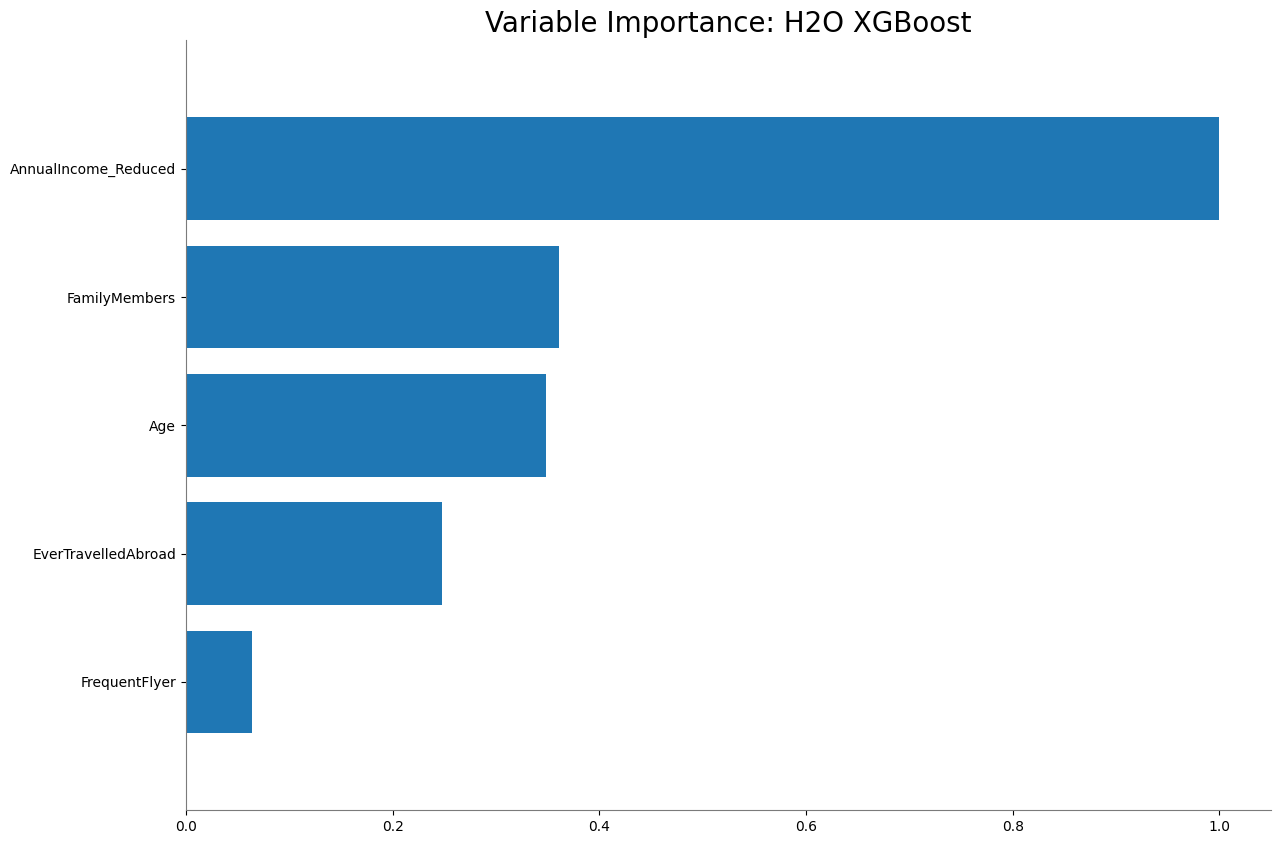

<Figure size 640x480 with 0 Axes>

In [38]:
%matplotlib inline
best_model.varimp_plot()

# Performing SHAP Analysis based on AutoML best model (XGBoost)

In [39]:
# Convert the test H2OFrame to a pandas DataFrame for use with SHAP
X_test_pd = test.as_data_frame(use_pandas=True, header=True)
#X_test_pd = X_test_pd.drop([target], axis=1)

# Convert the pandas DataFrame back to an H2OFrame for predict_contributions
X_test_h2o = h2o.H2OFrame(X_test_pd)

# Calculate SHAP values using predict_contributions
# Assuming leader_model is your trained model and X_test_h2o is your test data
shap_values_h2o = best_model.predict_contributions(X_test_h2o)

# Convert the SHAP values to a pandas DataFrame
shap_values_h2o_df = shap_values_h2o.as_data_frame()

# Print out the first few rows of the SHAP contributions
print(shap_values_h2o_df.head())

Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


████████████████████████████████████████████████████████████████| (done) 100%
contributions progress: |████████████████████████████████████████████████████████| (done) 100%
        Age  FamilyMembers  FrequentFlyer  EverTravelledAbroad  \
0 -0.086805       0.005523       0.002933            -0.027897   
1  0.125602      -0.110781       0.032144            -0.041803   
2 -0.029223      -0.022497       0.003559            -0.040699   
3 -0.121762       0.060890      -0.003450            -0.039075   
4 -0.017168      -0.050877      -0.002160            -0.030741   

   AnnualIncome_Reduced  BiasTerm  
0             -0.099333  0.347288  
1             -0.079083  0.347288  
2             -0.245425  0.347288  
3             -0.078472  0.347288  
4             -0.124394  0.347288  


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


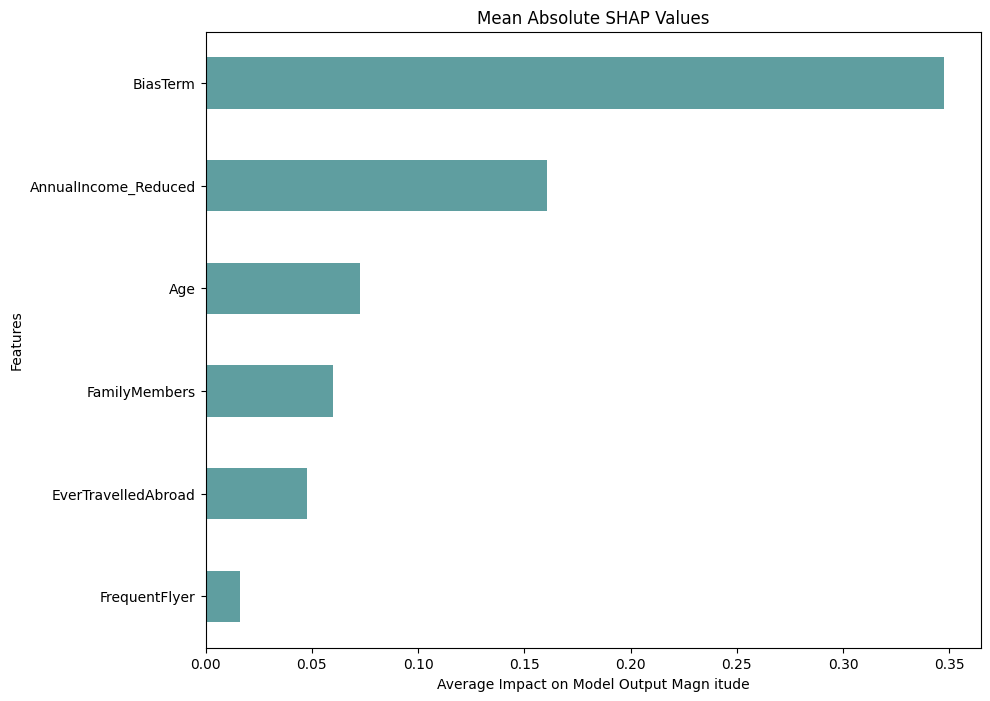

In [40]:
import matplotlib.pyplot as plt

# Calculate the mean absolute SHAP values for each feature
mean_abs_shap = shap_values_h2o_df.abs().mean().sort_values(ascending=True)

# Plot
mean_abs_shap.plot(kind='barh', figsize=(10, 8), color='cadetblue')
plt.title('Mean Absolute SHAP Values')
plt.xlabel('Average Impact on Model Output Magn itude')
plt.ylabel('Features')
plt.show()


# Outcome :

--> The above visualization shows a bar chart titled "Mean Absolute SHAP Values" which represents the average impact of different features on a predictive model's output magnitude. SHAP (SHapley Additive exPlanations) values quantify the contribution of each feature to the prediction of a machine learning model. The features are listed on the y-axis and their corresponding mean absolute SHAP values on the x-axis.

--> From the chart, we can see that 'BiasTerm' has the most significant impact on the model's output, followed by 'Age'. 'AnnualIncome_Reduced' also has a considerable effect, albeit less than 'Age'. 'FamilyMembers' and 'EverTravelledAbroad' appear to have a moderate impact. 'FrequentFlyer' has the least impact among the listed features.

# 1) Fit a linear model and interpret the regression coefficients

Accuracy: 0.7638190954773869
                      Coefficient
Age                      0.736051
FamilyMembers            1.071799
FrequentFlyer            0.516319
EverTravelledAbroad      1.778981
AnnualIncome_Reduced     2.890460
Intercept: -1.8890240633845807


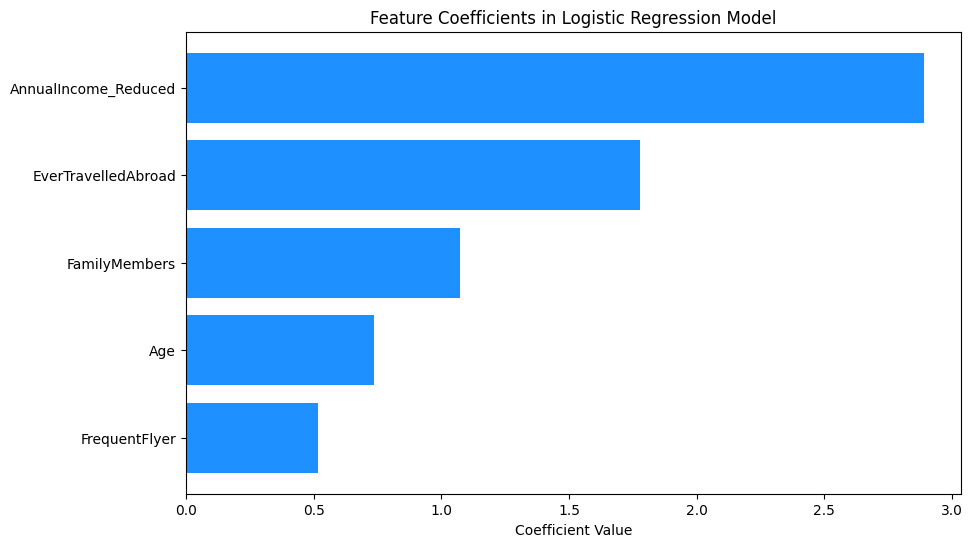

In [41]:
import matplotlib.pyplot as plt

# Fitting Logistic Regression to the Training set
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# Extracting coefficients
coefficients = model.coef_[0]  # model.coef_ returns a 2D array for multi-class. Use [0] for binary classification.
intercept = model.intercept_[0]  # Intercept of the model

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])

# Print the coefficients
print(coef_df)
print(f"Intercept: {intercept}")


# Sorting the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)

# Visualize the result
plt.figure(figsize=(10, 6))
plt.barh(coef_df.index, coef_df['Coefficient'], color='dodgerblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients in Logistic Regression Model')
plt.show()


# Outcome:

1) The accuracy of the logistic regression model is approximately 76.38%, which is the proportion of correct predictions made by the model on the test data set.

2) The coefficients obtained from the logistic regression model suggest how each feature impacts the prediction. Positive coefficients increase the log-odds of the outcome, whereas negative coefficients decrease the log-odds.

--> **Here's a breakdown of the coefficients from the output**:

a) AnnualIncome: Most significant positive coefficient, indicating that higher annual income is strongly associated with a positive outcome.

b) EverTravelledAbroad: Second highest positive coefficient, suggesting that those who have traveled abroad are more likely to have a positive outcome.

c) FamilyMembers: Positive coefficient, indicating that an increase in the number of family members is somewhat positively associated with the outcome.

d) Age: Smaller positive coefficient, which means that age has a lesser but still positive association with the outcome.

e) FrequentFlyer: Small positive coefficient.


3) The plot provided in the image visualizes the coefficients of the logistic regression model. It shows that AnnualIncome has the most positive influence on the predicted outcome, followed by EverTravelledAbroad, FamilyMembers, and Age.

4) Concept used:

--> Logistic Regression: A statistical model used for binary classification that predicts the probability of a categorical dependent variable. It's called "logistic" because it uses the logistic function to model the probability of the default class.

--> Coefficients: In logistic regression, coefficients represent the change in the log-odds of the outcome for a one-unit change in the predictor variable, assuming all other variables are held constant.

In [42]:
# 4. SHAP Analysis  (Linear Model)
# Calculate SHAP values
import shap

# Create the SHAP Explainer and calculate SHAP values for X_test
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test.iloc[0:1])

shap.initjs()

def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"



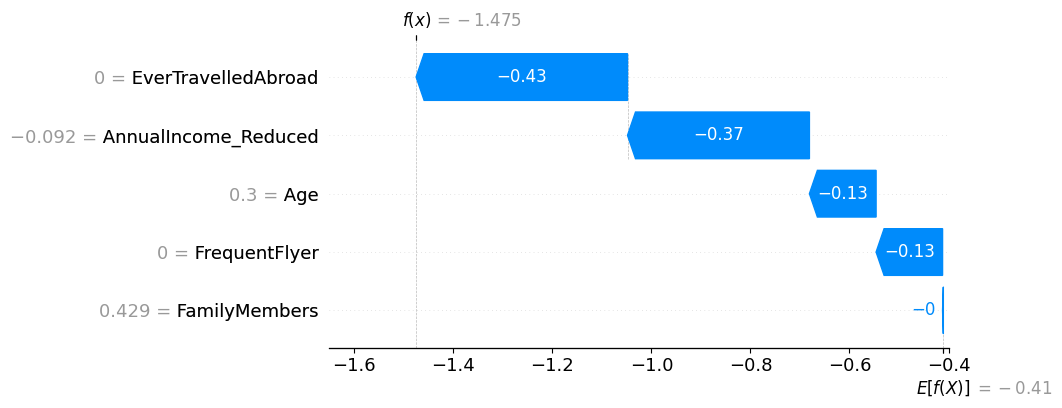

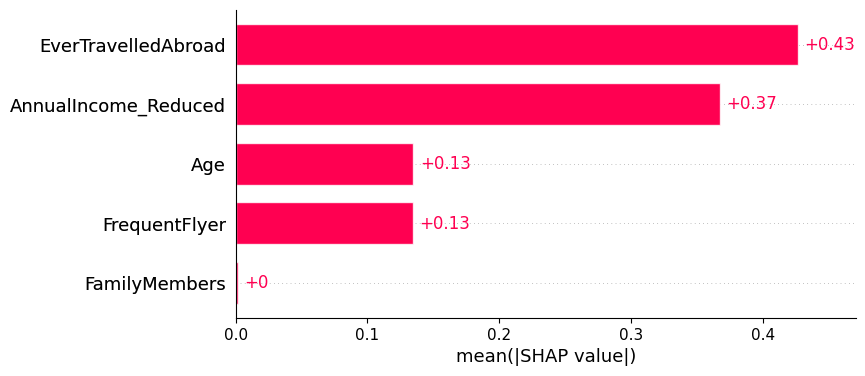

In [43]:
sample_feature_importance(0, 'waterfall')
print("")
shap.plots.bar(shap_values)

#Fitting a tree-based model and interpret the nodes

XGBoost Accuracy: 0.8366834170854272

Feature importances:
AnnualIncome_Reduced    0.489959
FamilyMembers           0.197776
Age                     0.152684
EverTravelledAbroad     0.086468
FrequentFlyer           0.073113
dtype: float32


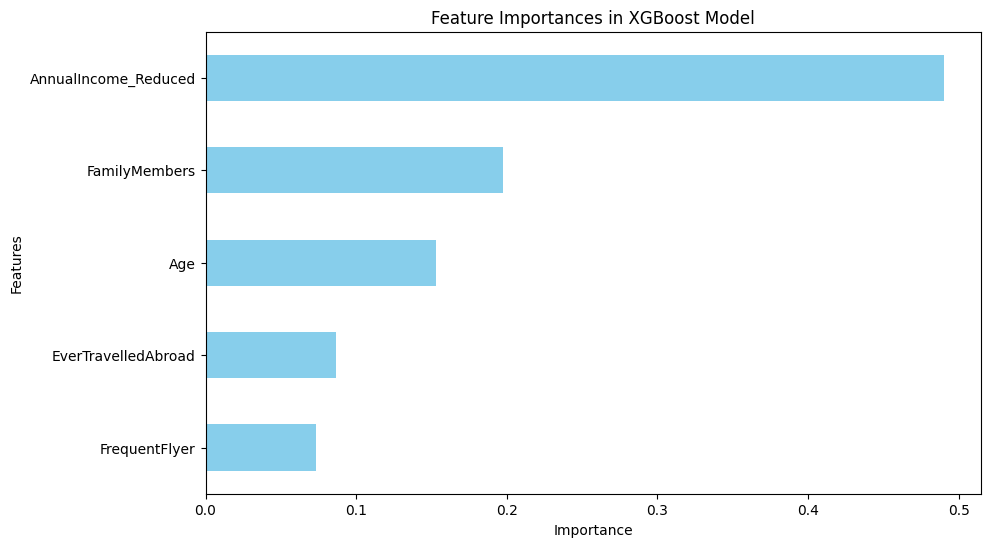

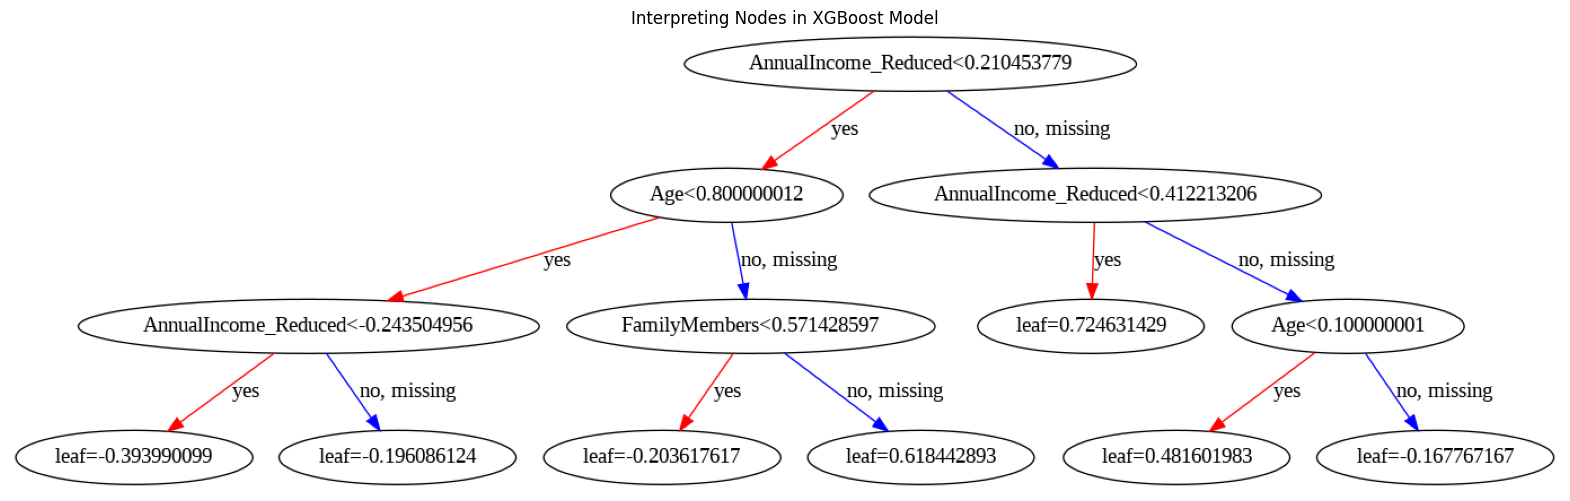

In [44]:
# Extreme Gradient Boosting
import matplotlib.pyplot as plt
import xgboost as xgb

# Fitting XGBoost to the Training set
xgb_classifier = XGBClassifier(use_label_encoder=False,max_depth = 3, eval_metric='logloss', random_state=42)
xgb_classifier.fit(X_train, y_train)

# Making predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")

# Feature importances
feature_names = X.columns
importances = xgb_classifier.feature_importances_
xgb_importances = pd.Series(importances, index=feature_names)

print("\nFeature importances:")
print(xgb_importances.sort_values(ascending=False))

# Visualize the result
xgb_importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Feature Importances in XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


# Convert the trained XGBoost model to a Booster object
booster = xgb_classifier.get_booster()

# Set the figure size and DPI
plt.figure(figsize=(20, 20), dpi=100)  # Adjust these values as needed

# Plot the first tree with the specified figsize and DPI
xgb.plot_tree(booster, num_trees=0, ax=plt.gca())
plt.title('Interpreting Nodes in XGBoost Model')

print("")
plt.show()


# Outcome :

 **XGBoost Accuracy**:

The accuracy of the XGBoost model on the test data set is approximately **83.66%**. This is higher than the logistic regression model provided earlier, suggesting that the XGBoost model may be better at predicting the outcomes for my dataset.

 **Feature Importances**:

The feature importances derived from the XGBoost model show how much each feature contributes to the model's predictions. In this output:

a) AnnualIncome has the highest importance score, indicating it is the most predictive feature for the outcome.

b) FamilyMembers and Age also have high importance scores.

c) FrequentFlyer has the least importance score, suggesting it contributes least to the model's predictions among the listed features.

 **Decision Tree Plot**:

--> The tree starts with a decision based on AnnualIncome_Reduced. If AnnualIncome_Reduced is less than or equal to -0.243504956, it follows the left branch to a leaf node with a value of approximately -0.39390099.

--> If at the initial node, AnnualIncome_Reduced is greater than -0.243504956, the next decision is made based on Age. If Age is less than or equal to -0.80000012, it takes the left branch, which then splits again on AnnualIncome_Reduced.

--> If AnnualIncome_Reduced is less than or equal to -0.412213206, it leads to a leaf node with a value of approximately -0.203617617. If it is greater than -0.412213206, it follows to a leaf node with a value of approximately -0.6184293.

--> Back at the second node, if Age is greater than -0.80000012, it moves to the right and splits again on FamilyMembers. If FamilyMembers is less than or equal to 0.57142857, it leads to a leaf node with a value of approximately -0.724631429.

--> If FamilyMembers is greater than 0.57142857, it proceeds to a leaf node with a value of approximately -0.16776167.

--> In this tree, the leaf nodes represent the score or weight that is assigned based on the conditions leading to them. These scores contribute to the final prediction of the XGBoost model.

--> The diagram uses red arrows to denote 'yes' paths when the condition is met at the decision node, and blue arrows to denote 'no' or missing paths when the condition is not met or the data is missing.

--> This visual representation is one of the possibly many decision trees that form the XGBoost model's ensemble, combining the output of all trees for the final prediction. The process reflects a sequence of binary decisions that lead to a prediction value at the end of each path.

 **Concept used**:

XGBoost: XGBoost stands for eXtreme Gradient Boosting. It is an advanced implementation of gradient boosting that is more efficient and can be used for both regression and classification problems.

Gradient Boosting: This is a machine learning technique that creates a predictive model in the form of an ensemble of weak predictive models, typically decision trees. It builds the model in a stage-wise fashion and generalizes them by allowing optimization of an arbitrary differentiable loss function.

Booster Object: In XGBoost, the Booster is the low-level interface to the gradient boosting model. Converting the XGBoost model to a Booster object allows access to lower-level functions like plotting the tree.

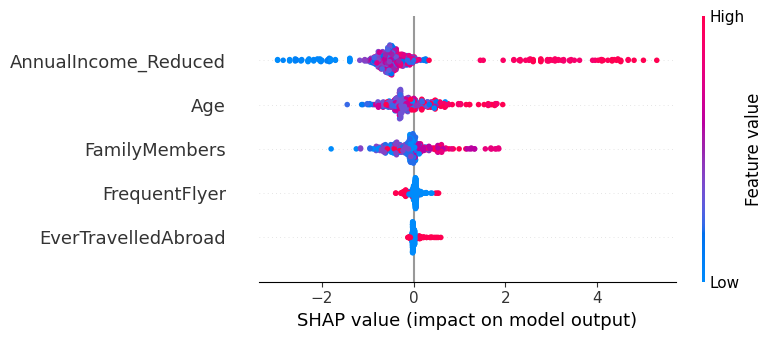

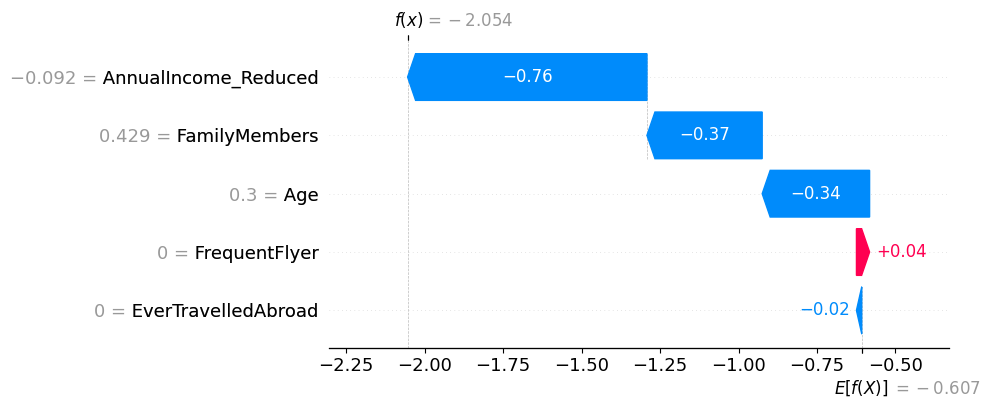

In [45]:
#XGBoost

import shap

# Create a SHAP explainer object for the XGBoost model
explainer_xgb = shap.Explainer(xgb_classifier)

# Calculate SHAP values for the test set
shap_values_xgb = explainer_xgb(X_test)

# Summary plot of SHAP values for all features across all test instances
shap.summary_plot(shap_values_xgb, X_test)
print("")
# Detailed SHAP value plot for the first instance in the test set
# This shows the impact of each feature on the model's output
shap.plots.waterfall(shap_values_xgb[0], max_display=10)


# Summary

--> "Annual Income" and "Family Members" is the most important features based on above report across all methods used.

--> Xgboost is the best decision tree model for the above dataset and has maximum 83.66% accuracy.

# References:

1) ChatGPT

2) https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

3)https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynb

4)https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Basics_InnerWorkings_Interpretations.ipynb



MIT License

Copyright (c) 2024 Anzal Shaikh

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.